In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID').sort_values(by='ID')

In [3]:
data.head(10).T

ID,0,1,9,13,17,20,22,24,25,35
Year_Birth,1985,1961,1975,1947,1971,1965,1976,1960,1958,1987
Education,Graduation,Graduation,Master,PhD,PhD,2n Cycle,Graduation,Master,Graduation,Graduation
Marital_Status,Married,Single,Single,Widow,Married,Married,Divorced,Together,Married,Married
Income,70951.0,57091.0,46098.0,25358.0,60491.0,46891.0,46310.0,17144.0,65148.0,25545.0
Kidhome,0,0,1,0,0,0,1,1,0,1
Teenhome,0,0,1,1,1,1,0,1,1,0
Dt_Customer,04-05-2013,15-06-2014,18-08-2012,22-07-2013,06-09-2013,01-09-2013,03-12-2012,15-02-2014,16-11-2012,08-09-2012
Recency,66,0,86,57,81,91,99,96,9,35
MntWines,239,464,57,19,637,43,185,18,460,32
MntFruits,10,5,0,0,47,12,2,2,35,1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


<Axes: >

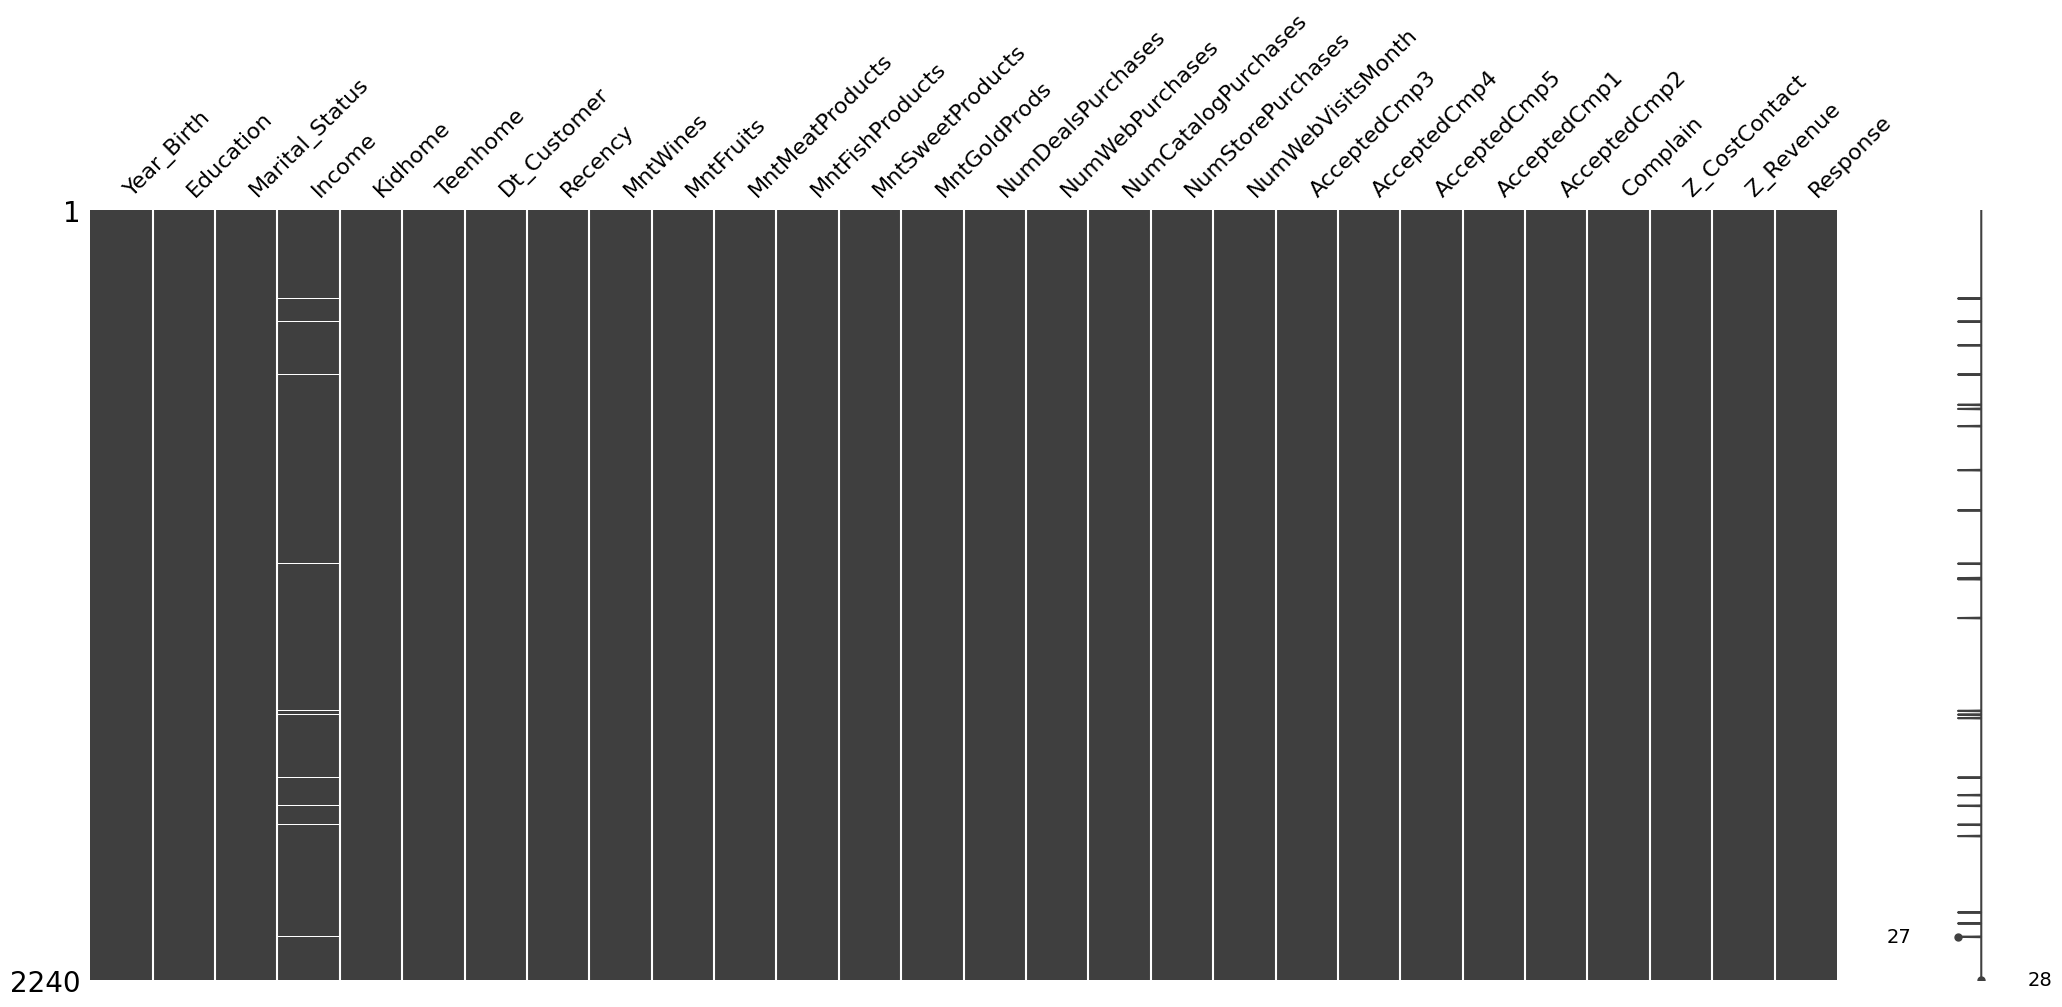

In [5]:
msno.matrix(data)

In [6]:
data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data = data.drop_duplicates()

In [9]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,10,...,1,0,0,0,0,0,0,3,11,0
1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,5,...,5,0,0,0,0,1,0,3,11,1
9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,0,...,8,0,0,0,0,0,0,3,11,0
13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,0,...,6,0,0,0,0,0,0,3,11,0
17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,47,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,1970,PhD,Together,65968.0,0,1,12-05-2014,12,376,9,...,3,0,0,0,0,0,0,3,11,0
11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,2,...,7,0,0,0,0,0,0,3,11,0
11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,0,0,3,11,0


In [10]:
def filter_by_quantiles(dataset, quantile1, quantile2):
    quantile_df = dataset.select_dtypes(include=[np.number]).quantile([quantile1, quantile2])
    for column in quantile_df:
        dataset = dataset[(dataset[column] >= quantile_df[column][quantile1]) & (dataset[column] <= quantile_df[column][quantile2])]
    return dataset

In [11]:
data = filter_by_quantiles(data, 0.01, 0.99)

In [12]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,5,...,5,0,0,0,0,1,0,3,11,1
9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,0,...,8,0,0,0,0,0,0,3,11,0
13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,0,...,6,0,0,0,0,0,0,3,11,0
17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,47,...,5,0,0,0,0,0,0,3,11,0
20,1965,2n Cycle,Married,46891.0,0,1,01-09-2013,91,43,12,...,4,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11166,1961,Graduation,Married,49678.0,0,1,02-02-2013,81,229,5,...,7,0,0,0,0,0,0,3,11,0
11176,1970,PhD,Together,65968.0,0,1,12-05-2014,12,376,9,...,3,0,0,0,0,0,0,3,11,0
11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,2,...,7,0,0,0,0,0,0,3,11,0


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1811.0,1968.881281,11.335503,1945.0,1959.0,1970.0,1977.0,1992.0
Income,1811.0,50317.495306,19486.025892,7500.0,34788.0,49678.0,65675.0,94472.0
Kidhome,1811.0,0.469354,0.539618,0.0,0.0,0.0,1.0,2.0
Teenhome,1811.0,0.532303,0.544617,0.0,0.0,1.0,1.0,2.0
Recency,1811.0,48.901160,28.768530,0.0,24.0,49.0,74.0,98.0
MntWines,1811.0,284.338487,318.663259,1.0,23.0,159.0,474.5,1285.0
MntFruits,1811.0,23.198233,35.055188,0.0,1.0,7.0,28.0,172.0
MntMeatProducts,1811.0,146.461071,197.260254,2.0,16.0,59.0,194.5,915.0
MntFishProducts,1811.0,32.293760,47.887805,0.0,2.0,11.0,39.0,225.0
MntSweetProducts,1811.0,23.760906,36.320941,0.0,1.0,8.0,29.0,178.0


In [14]:
data = data.drop(['Z_CostContact', 'Z_Revenue', 'Complain'], axis=1)

In [15]:
data.nunique()

Year_Birth               48
Education                 5
Marital_Status            8
Income                 1757
Kidhome                   3
Teenhome                  3
Dt_Customer             645
Recency                  99
MntWines                705
MntFruits               139
MntMeatProducts         484
MntFishProducts         156
MntSweetProducts        158
MntGoldProds            187
NumDealsPurchases        11
NumWebPurchases          12
NumCatalogPurchases      12
NumStorePurchases        12
NumWebVisitsMonth         9
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
dtype: int64

<Axes: xlabel='Income', ylabel='Count'>

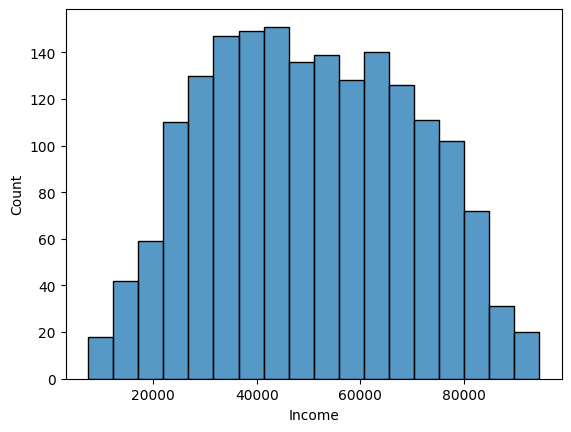

In [16]:
sns.histplot(data.Income)

In [17]:
data.Income.describe()

count     1811.000000
mean     50317.495306
std      19486.025892
min       7500.000000
25%      34788.000000
50%      49678.000000
75%      65675.000000
max      94472.000000
Name: Income, dtype: float64

In [18]:
data['Income'] = pd.cut(data.Income, bins=[-1, 34788, 49678, 65675, 100000], labels=['Poor', 'Middle', 'Rich', 'Very rich'])

In [26]:
data.Dt_Customer = pd.to_datetime(data.Dt_Customer, format='%d-%m-%Y')

<Axes: xlabel='Dt_Customer', ylabel='Count'>

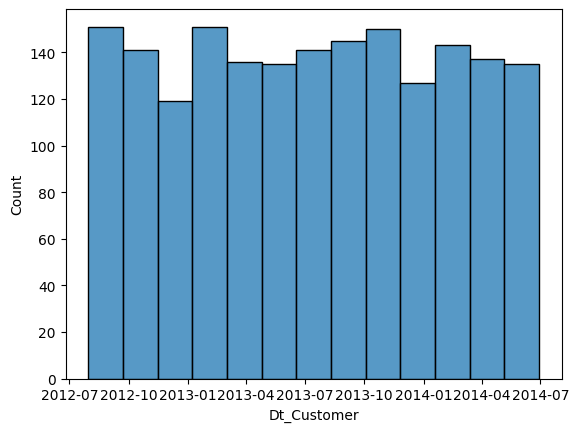

In [29]:
sns.histplot(data.Dt_Customer)